# Data Preprocessing

**When we get the dataset we have to perform some pre processing steps to make the data ready for further analysis or predictions**

    **1) Missing Value Treatment**
        a) The missing value treatment is required on both categorical data or numerical data
        b) Lets assume there are 1000 data points, we cannot manipulate more than 25% of the data, if the business is critical than we have to reduce this 25% to some less percentages 
        c) How can we populate/impute the missing
            c.1) Numerical data
                i) Mean - Populate the mean of the column, for example we have an age and there are some missing values we will populate those missing values with mean. This approach is good when there are no outliers in the dataset 
                ii) Median - Populate the median of the column when there are outliers in the dataset
                iii) Rather doing the missing value treatment, first do the outlier treatment and then do the missing value treatment
            c.2) Categorical data 
                i) Mode (Most Frequent) - Populate the missing value with the mode, if there is a gender column and in that there are more number of males, so we will populate the missing value using male
                
      d) There is one more algorithmic way to populate the missing value - K-nearest neighbour (It populates the missing value using the average of the nearest neighbours
      
**scikit-learn - This of the machine learning packages, this can solve the problem, we just have to import the package and corresponding module**

**https://scikit-learn.org**

    **2) Outlier Treatment**
        a) There is an industry standard formula any value less than Q1-1.5*IQR or any value more than Q3+1.5*IQR are outliers
        
        
        
    **3) Encoding**
        Converting the categorical columns to numerical columns, as we are dealing with mathematics and statistics we need to convert categoical columns to numerical columns
        
        a) Label encoding - It is a technique where we convert the data into numbers from 0,1,2.... however, it is not good for nominal data as there is no rank associated with nominal data, but it is good to have in the ordinal data
        
        b) One hot encoding - We are giving values in a binary type as in, if there are 4 states, S1 will be 1|0|0|0, S2 will be 0|1|0|0, S3 will be 0|0|1|0 and S4 will be 0|0|0|1. The problem with this approach is it will increase the dimensions. 
        
       c) Encoding based on the dependent variable - When there is a regression problem, for example want to find the salary we can take the average of the salary by states and populate the average salary by states in the state column. If the problem statement is classification for example we need to predict if we get the promotion or not, in that case we will populate the state column by probabilty of P(S)/Total or P(F)/Total for that state
       
    **4) Feature Scaling**
          Converting the data into the same scale. i.e. unit less. Because in the distance based algorithms it can give us biased distances, for example: if we have experience and salary, salary will be a bigger number than experience so the distance between the employees will be dominated by salary. Also, as  we are calculating the distance it will not make sense to find he distance based on the different units i.e. one is in year and other is in rupees.
        


In [1]:
import pandas as pd

In [2]:
df_missing_value = pd.read_clipboard()

In [15]:
df_missing_value

,Student_Id,Marks_10,Marks_12,Marks_Grad,State,Salary
0,1,45.0,NaN,56.0,1.0,10
1,2,NaN,65.0,67.0,1.0,12
2,3,54.0,68.0,57.0,0.0,14
3,4,89.0,88.0,NaN,NaN,18
4,5,NaN,87.0,84.0,1.0,21


**How to impute the missing values using sklearn**

In [16]:
x_mean = df_missing_value.iloc[:,0:6].values

In [17]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imp.fit(x_mean[:,1:4])
x_mean[:,1:4] = imputer.transform(x_mean[:,1:4])

In [18]:
pd.DataFrame(x_mean)

,0,1,2,3,4,5
0,1.0,45.000000,77.0,56.0,1.0,10.0
1,2.0,62.666667,65.0,67.0,1.0,12.0
2,3.0,54.000000,68.0,57.0,0.0,14.0
3,4.0,89.000000,88.0,66.0,NaN,18.0
4,5.0,62.666667,87.0,84.0,1.0,21.0


In [19]:
x_median = df_missing_value.iloc[:,0:6].values

In [20]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imp.fit(x_median[:,1:4])
x_median[:,1:4] = imputer.transform(x_median[:,1:4])

In [21]:
x_median

array([[ 1. , 45. , 77.5, 56. ,  1. , 10. ],
       [ 2. , 54. , 65. , 67. ,  1. , 12. ],
       [ 3. , 54. , 68. , 57. ,  0. , 14. ],
       [ 4. , 89. , 88. , 62. ,  nan, 18. ],
       [ 5. , 54. , 87. , 84. ,  1. , 21. ]])

In [22]:
x_mode = df_missing_value.iloc[:,0:6].values

In [23]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imp.fit(x_mode[:,4:5])
x_mode[:,4:5] = imputer.transform(x_mode[:,4:5])

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [24]:
x_mode

array([[ 1., 45., nan, 56.,  1., 10.],
       [ 2., nan, 65., 67.,  1., 12.],
       [ 3., 54., 68., 57.,  0., 14.],
       [ 4., 89., 88., nan,  1., 18.],
       [ 5., nan, 87., 84.,  1., 21.]])

**Using Dataframe directly we can populate the missing value**

In [26]:
df1 = df_missing_value.copy()

In [29]:
df1['Marks_10'] = df1['Marks_10'].fillna(df1['Marks_10'].mean())

In [32]:
df1['Marks_12'] = df1['Marks_12'].fillna(df1['Marks_12'].median())

In [33]:
df1

,Student_Id,Marks_10,Marks_12,Marks_Grad,State,Salary
0,1,45.000000,77.5,56.0,1.0,10
1,2,62.666667,65.0,67.0,1.0,12
2,3,54.000000,68.0,57.0,0.0,14
3,4,89.000000,88.0,NaN,NaN,18
4,5,62.666667,87.0,84.0,1.0,21


**Algorithmic Way - K-Nearest Neighbour**

In [41]:
x_knn = df_missing_value.iloc[:,0:6].values

In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
x_knn = imputer.fit_transform(x_knn)

In [43]:
x_knn

array([[ 1., 45., 68., 56.,  1., 10.],
       [ 2., 54., 65., 67.,  1., 12.],
       [ 3., 54., 68., 57.,  0., 14.],
       [ 4., 89., 88., 84.,  1., 18.],
       [ 5., 89., 87., 84.,  1., 21.]])

**Outlier Treatment**

In [44]:
df_outlier_treatment = pd.read_clipboard()

In [45]:
df_outlier_treatment

,Department,Age,Experience
0,HR,21,1
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10
8,Marketing,31,2
9,IT,55,35


In [49]:
q1 = df_outlier_treatment.quantile(0.25)

In [53]:
q3 = df_outlier_treatment.quantile(0.75)

In [51]:
iqr = df_outlier_treatment.quantile(0.75)-df_outlier_treatment.quantile(0.25)

In [55]:
df_outlier_treatment[~((df_outlier_treatment<(q1 - 1.5*iqr)) | (df_outlier_treatment>(q3+1.5*iqr))).any(axis=1)]

C:\Users\rahul\AppData\Local\Temp\ipykernel_16560\4278517277.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outlier_treatment[~((df_outlier_treatment<(q1 - 1.5*iqr)) | (df_outlier_treatment>(q3+1.5*iqr))).any(axis=1)]


,Department,Age,Experience
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10


In [56]:
def outlier_treatment(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3-Q1
    df_rem_out = dataframe[~((dataframe<(Q1 - 1.5*IQR)) | (dataframe>(Q3+1.5*IQR))).any(axis=1)]
    return df_rem_out

In [57]:
outlier_treatment(df_outlier_treatment)

C:\Users\rahul\AppData\Local\Temp\ipykernel_16560\3352533567.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_rem_out = dataframe[~((dataframe<(Q1 - 1.5*IQR)) | (dataframe>(Q3+1.5*IQR))).any(axis=1)]


,Department,Age,Experience
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10


**Encoding**

**Label Encoding**

In [58]:
from sklearn.preprocessing import LabelEncoder

df_nominal = pd.DataFrame({'state':['CA','NY','TX','CA','TX','NY','CA'], 'salary':[50000,60000,70000,55000,65000,75000,60000]})

In [59]:
df_nominal

,state,salary
0,CA,50000
1,NY,60000
2,TX,70000
3,CA,55000
4,TX,65000
5,NY,75000
6,CA,60000


In [60]:
encoder = LabelEncoder()
df_nominal['state_encoded'] = encoder.fit_transform(df_nominal['state'])

In [61]:
df_nominal

,state,salary,state_encoded
0,CA,50000,0
1,NY,60000,1
2,TX,70000,2
3,CA,55000,0
4,TX,65000,2
5,NY,75000,1
6,CA,60000,0


**One Hot Encoding**

In [69]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

In [72]:
state_encoded = onehot_encoder.fit_transform(df_nominal[['state']])
state_columns = onehot_encoder.get_feature_names(['state'])

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
df_state_encoded = pd.DataFrame(state_encoded,columns=state_columns)

In [76]:
pd.concat([df_nominal,df_state_encoded],axis=1)

,state,salary,state_encoded,state_CA,state_NY,state_TX
0,CA,50000,0,1.0,0.0,0.0
1,NY,60000,1,0.0,1.0,0.0
2,TX,70000,2,0.0,0.0,1.0
3,CA,55000,0,1.0,0.0,0.0
4,TX,65000,2,0.0,0.0,1.0
5,NY,75000,1,0.0,1.0,0.0
6,CA,60000,0,1.0,0.0,0.0


**Ordinal data encoding**

In [62]:
df_ordinal = pd.DataFrame({'feedback':['Poor','Average', 'Good', 'Excellent', 'Good', 'Poor', 'Average']})

In [63]:
df_ordinal

,feedback
0,Poor
1,Average
2,Good
3,Excellent
4,Good
5,Poor
6,Average


In [64]:
label_mapping = {'Poor':0, 'Average':1, 'Good':2, 'Excellent':3}

In [65]:
label_mapping

{'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}

In [66]:
df_ordinal['feedback_encoded'] = df_ordinal['feedback'].map(label_mapping)

In [67]:
df_ordinal

,feedback,feedback_encoded
0,Poor,0
1,Average,1
2,Good,2
3,Excellent,3
4,Good,2
5,Poor,0
6,Average,1


**Feature Scaling**

**Standard Scaler** - SKLearn uses population standard deviation formula to do the calculations

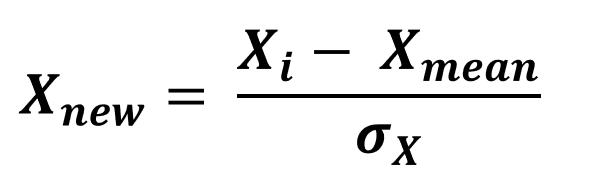

In [79]:
df_standard

,State,Age,Salary,Purchase
0,California,21,21000,No
1,Texas,25,25000,No
2,Arizona,23,25000,Yes
3,Utah,33,30000,Yes
4,California,45,35000,Yes


In [80]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_std = df_standard.iloc[:,1:3].values
x_std = sc_x.fit_transform(x_std)

In [81]:
x_std

array([[-0.95454545, -1.28278913],
       [-0.5       , -0.45518324],
       [-0.72727273, -0.45518324],
       [ 0.40909091,  0.57932412],
       [ 1.77272727,  1.61383148]])

**Min Max Scalar** - In the min max scaler the values will vary from 0 to 1 

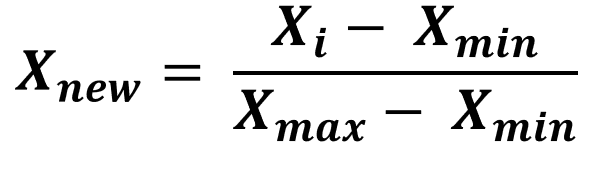

In [82]:
from sklearn.preprocessing import MinMaxScaler

mm_x = MinMaxScaler()
x_mm = df_standard.iloc[:,1:3].values
x_mm = mm_x.fit_transform(x_mm)

In [83]:
x_mm

array([[0.        , 0.        ],
       [0.16666667, 0.28571429],
       [0.08333333, 0.28571429],
       [0.5       , 0.64285714],
       [1.        , 1.        ]])

**Robust Scaler** - We are using median and percentiles to transform the data

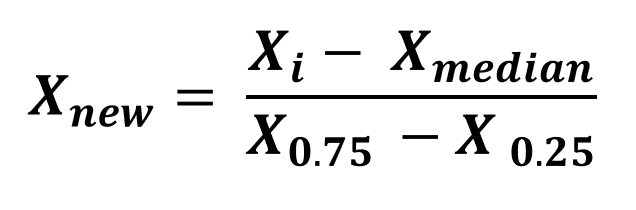

In [84]:
from sklearn.preprocessing import RobustScaler

rb_x = RobustScaler()
x_rb = df_standard.iloc[:,1:3].values
x_rb = rb_x.fit_transform(x_rb)

In [85]:
x_rb

array([[-0.4, -0.8],
       [ 0. ,  0. ],
       [-0.2,  0. ],
       [ 0.8,  1. ],
       [ 2. ,  2. ]])

**Max Absolute Scaler** - Division of all the data points with the absolute value of max of x

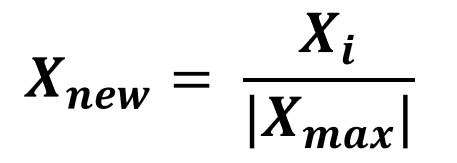

In [86]:
from sklearn.preprocessing import MaxAbsScaler

ma_x = MaxAbsScaler()
x_ma = df_standard.iloc[:,1:3].values
x_ma = ma_x.fit_transform(x_ma)

In [87]:
x_ma

array([[0.46666667, 0.6       ],
       [0.55555556, 0.71428571],
       [0.51111111, 0.71428571],
       [0.73333333, 0.85714286],
       [1.        , 1.        ]])